# FastText Classifier

## Training the Model

In [1]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
# loading the movie dataset
from google.colab import files
movies = files.upload()

Saving movies.csv to movies.csv


In [3]:
# creating pandas dataframe
import pandas as pd
col_names = ["genre", "split"]
data = pd.read_csv("movies.csv", sep=";", names=col_names)
data = data.sample(frac=1, random_state=42)
data.head()

,genre,split
8826,superhero,"ruling, brother. a throne would suit you ill. ..."
3172,comedy,the hotel. you'd better go straight to the bas...
9221,western,"shooting a man, son. no, it isn't. not in my o..."
718,action,that. we've only got seven minutes. passengers...
3133,comedy,the thames men later became spinal tap and had...


In [4]:
# remove empty lines
data.dropna(inplace=True)

In [6]:
data.genre.unique()

array(['superhero', 'comedy', 'western', 'action', 'fantasy', 'history',
       'adventure', 'sport', 'drama', 'scifi'], dtype=object)

In [7]:
# When you train a fasttext model, it expects labels to be specified with label
# prefix. We will just create a third column in the dataframe that has label as
# well as the subtitle split.
data['genre'] = '__label__' + data['genre'].astype(str)
data.head()

,genre,split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ..."
3172,__label__comedy,the hotel. you'd better go straight to the bas...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o..."
718,__label__action,that. we've only got seven minutes. passengers...
3133,__label__comedy,the thames men later became spinal tap and had...


In [10]:
data['genre_split'] = data['genre'] + ' ' + data['split']
data.head()

,genre,split,genre_split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ...","__label__superhero ruling, brother. a throne w..."
3172,__label__comedy,the hotel. you'd better go straight to the bas...,__label__comedy the hotel. you'd better go str...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o...","__label__western shooting a man, son. no, it i..."
718,__label__action,that. we've only got seven minutes. passengers...,__label__action that. we've only got seven min...
3133,__label__comedy,the thames men later became spinal tap and had...,__label__comedy the thames men later became sp...


In [11]:
import re

# Preprocessing of the text: remove punctuation, remove extra space, make the
# entire sentence lower case
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower()

In [12]:
data['genre_split'] = data['genre_split'].map(preprocess)
data.head()

,genre,split,genre_split
8826,__label__superhero,"ruling, brother. a throne would suit you ill. ...",__label__superhero ruling brother a throne wou...
3172,__label__comedy,the hotel. you'd better go straight to the bas...,__label__comedy the hotel you'd better go stra...
9221,__label__western,"shooting a man, son. no, it isn't. not in my o...",__label__western shooting a man son no it isn'...
718,__label__action,that. we've only got seven minutes. passengers...,__label__action that we've only got seven minu...
3133,__label__comedy,the thames men later became spinal tap and had...,__label__comedy the thames men later became sp...


In [29]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [30]:
train.shape, test.shape

((8131, 3), (2033, 3))

In [31]:
# Is the train data balanced?
train.genre.value_counts()

__label__comedy       973
__label__drama        818
__label__scifi        803
__label__action       802
__label__western      799
__label__superhero    794
__label__sport        792
__label__adventure    785
__label__history      783
__label__fantasy      782
Name: genre, dtype: int64

<Axes: ylabel='genre'>

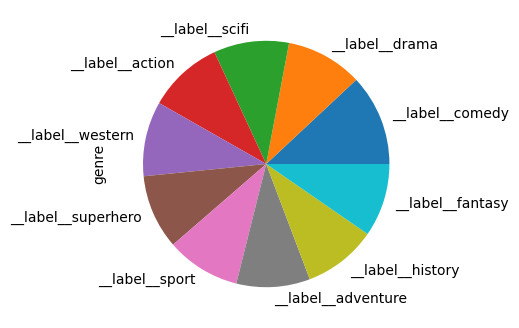

In [32]:
train.genre.value_counts().plot(kind="pie", figsize=(4,4))

In [33]:
# Saving the training and test set to csv.-files
train.to_csv("movies.train", columns=["genre_split"], index=False, header=False)
test.to_csv("movies.test", columns=["genre_split"], index=False, header=False)

In [19]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199771 sha256=c797403fa4eb32b6aed2513b7d199d7fc655f445eac69632e3382a0e800229e4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [51]:
import fasttext

# Which number of epochs is the best? - 36 (37/39) --> 0.7437284800787014 (precision)
#                                                  --> 0.7437284800787014 (recall)
for i in range(5,45):
  model = fasttext.train_supervised(input="movies.train", lr=1.0, epoch=i)
  print(f"Epoch: {str(i)} " + str(model.test("movies.test")))

Epoch: 5 (2033, 0.7299557304476144, 0.7299557304476144)
Epoch: 6 (2033, 0.7368421052631579, 0.7368421052631579)
Epoch: 7 (2033, 0.7407771765863256, 0.7407771765863256)
Epoch: 8 (2033, 0.7393015248401378, 0.7393015248401378)
Epoch: 9 (2033, 0.7388096409247418, 0.7388096409247418)
Epoch: 10 (2033, 0.7373339891785539, 0.7373339891785539)
Epoch: 11 (2033, 0.7412690605017216, 0.7412690605017216)
Epoch: 12 (2033, 0.7378258730939499, 0.7378258730939499)
Epoch: 13 (2033, 0.7368421052631579, 0.7368421052631579)
Epoch: 14 (2033, 0.736350221347762, 0.736350221347762)
Epoch: 15 (2033, 0.7402852926709297, 0.7402852926709297)
Epoch: 16 (2033, 0.736350221347762, 0.736350221347762)
Epoch: 17 (2033, 0.734874569601574, 0.734874569601574)
Epoch: 18 (2033, 0.7393015248401378, 0.7393015248401378)
Epoch: 19 (2033, 0.7368421052631579, 0.7368421052631579)
Epoch: 20 (2033, 0.735858337432366, 0.735858337432366)
Epoch: 21 (2033, 0.7373339891785539, 0.7373339891785539)
Epoch: 22 (2033, 0.7373339891785539, 0.73733

In [54]:
!pip install numpy

In [55]:
import numpy as np

# Which learning rate is the best? - 0.35 --> 0.7550418101328087 (precision)
#                                         --> 0.7550418101328087 (recall)
for j in np.arange(0.0,1.05,0.05):
  model = fasttext.train_supervised(input="movies.train", lr=j, epoch=36)
  print(f"Learning rate: {str(j)} " + str(model.test("movies.test")))

Learning rate: 0.0 (2033, 0.1042793900639449, 0.1042793900639449)
Learning rate: 0.05 (2033, 0.5636989670437776, 0.5636989670437776)
Learning rate: 0.1 (2033, 0.7368421052631579, 0.7368421052631579)
Learning rate: 0.15000000000000002 (2033, 0.749631087063453, 0.749631087063453)
Learning rate: 0.2 (2033, 0.7515986227250369, 0.7515986227250369)
Learning rate: 0.25 (2033, 0.7540580423020167, 0.7540580423020167)
Learning rate: 0.30000000000000004 (2033, 0.7530742744712248, 0.7530742744712248)
Learning rate: 0.35000000000000003 (2033, 0.7550418101328087, 0.7550418101328087)
Learning rate: 0.4 (2033, 0.750614854894245, 0.750614854894245)
Learning rate: 0.45 (2033, 0.750614854894245, 0.750614854894245)
Learning rate: 0.5 (2033, 0.7466797835710772, 0.7466797835710772)
Learning rate: 0.55 (2033, 0.7447122479094933, 0.7447122479094933)
Learning rate: 0.6000000000000001 (2033, 0.7452041318248893, 0.7452041318248893)
Learning rate: 0.65 (2033, 0.7466797835710772, 0.7466797835710772)
Learning rate:

In [56]:
# Which n-gram size is the best? - Unigram --> 0.7550418101328087 (precision)
#                                          --> 0.7550418101328087 (recall)
for k in range(1,6):
  model = fasttext.train_supervised(input="movies.train", lr=0.35, epoch=36, wordNgrams=k)
  print(f"n-gram: {str(k)} " + str(model.test("movies.test")))

n-gram: 1 (2033, 0.7550418101328087, 0.7550418101328087)
n-gram: 2 (2033, 0.6994589276930644, 0.6994589276930644)
n-gram: 3 (2033, 0.6517461878996557, 0.6517461878996557)
n-gram: 4 (2033, 0.6222331529758977, 0.6222331529758977)
n-gram: 5 (2033, 0.5858337432365962, 0.5858337432365962)


In [ ]:
# Train the best model
model = fasttext.train_supervised(input="movies.train", lr=0.35, epoch=36, wordNgrams=1)
model.test("movies.test")

## Testing the Model

### Showtime (2002)

In [58]:
# loading the test dataset (Showtime)
test = files.upload()

Saving showtime.csv to showtime.csv


In [60]:
# create a pandas dataframe from the test data
col_names = ["genre", "split"]
test_data = pd.read_csv("showtime.csv", sep=";", names=col_names)
test_data["split"] = test_data['split'].map(preprocess)
test_data.head()

,genre,split
0,action,being a policeman is not what you see on tv i'...
1,action,hunt you down and put you behind bars i won't ...
2,action,rights you should've called for backup my only...
3,action,gonna miss him i'll need your gun and your shi...
4,action,restroom on the left don't give up the day job...


In [65]:
# predict the genre of the splits
predictions = []

for i in range(len(test_data["split"])):
    prediction = model.predict(test_data["split"][i])
    prediction = prediction[0][0].replace("__label__","")
    predictions.append(prediction)

In [66]:
# the movie is a action comedy so the two most frequent labels should be "action" & "comedy"
from collections import Counter

counter = Counter(predictions)
most_frequent = counter.most_common(10)

print(most_frequent)

[('drama', 34), ('comedy', 19), ('action', 13), ('scifi', 12), ('superhero', 8), ('western', 5), ('sport', 4), ('history', 4), ('fantasy', 1)]


### The Equalizer 3 (2023)

In [67]:
# loading the test dataset (The Equalizer 3)
test2 = files.upload()

Saving equalizer.csv to equalizer.csv


In [69]:
# create a pandas dataframe from the test data
test_data2 = pd.read_csv("equalizer.csv", sep=";", names=col_names)
test_data2 = test_data2.dropna()
test_data2["split"] = test_data2['split'].map(preprocess)
test_data2.head()

,genre,split
0,action,wait here he told me to wait outside let's go ...
1,action,for you you know who i am then i know what you...
2,action,are except you're a few meters short of what y...
3,action,dead already he just doesn't know it yet i fee...
4,action,very low he wouldn't have made it to the hospi...


In [77]:
# predict the genre of the splits
predictions2 = []

for i in range(len(test_data2["split"])):
    prediction2 = model.predict(test_data["split"][i])
    prediction2 = prediction2[0][0].replace("__label__","")
    predictions2.append(prediction2)

In [78]:
# the movie is a action drama so the two most frequent labels should be "action" & "drama"
counter2 = Counter(predictions2)
most_frequent2 = counter2.most_common(10)

print(most_frequent2)

[('drama', 34), ('comedy', 19), ('scifi', 12), ('action', 12), ('superhero', 8), ('western', 5), ('sport', 4), ('history', 4), ('fantasy', 1)]


## Saving the Model

In [79]:
# Saving the best model
model.save_model("model_movies.bin")

In [93]:
# Loading the model
model = fasttext.load_model("model_movies.bin")

In [94]:
model.predict("being a policeman is not what you see on tv")

(('__label__action',), array([0.650886]))

In [95]:
model.predict("same gun that put holes in your tv repair shop it appears to be hand-held automatic with interchangeable magazines")

(('__label__action',), array([0.50415206]))

In [96]:
model.predict("you try out for the village people")

(('__label__western',), array([0.9867025]))